rozdelenie psov na tie, ktore maju podla svojich majitelov separation anxiety a tych co ju nemaju

Text(0, 0.5, 'Count')

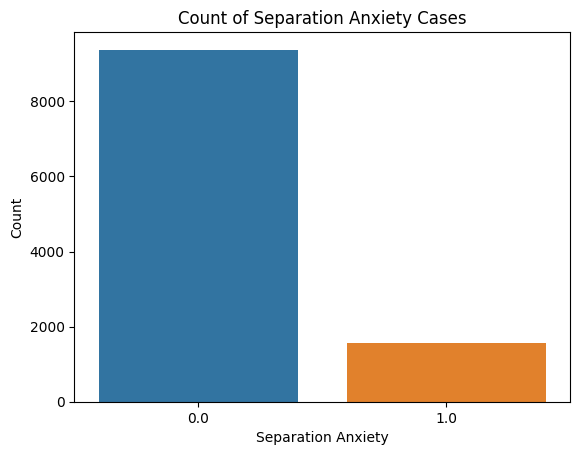

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import Markdown


dogs = pd.read_csv("psy_data.csv", header=0).set_index("dog.id")
subset = dogs.loc[:, ['Separation_age', 'Leaving_pant', 'Leaving_vocalization', "Leaving_salivate", "Leaving_restless", "Alone_destroy", "Alone_urinate", "Alone_vocalize", "Alone_pant", "separation_anxiety", "separation_behavior_score","breed_group"]]
sns.countplot(data=subset, x="separation_anxiety", hue="separation_anxiety", legend = False)
plt.title("Count of Separation Anxiety Cases")
plt.xlabel("Separation Anxiety")
plt.ylabel("Count")


rozdelenie psov na tie, ktore maju podla snadpriemernu nameranu separation anxiety a tych co ju maju podpriemernu

Text(0, 0.5, 'Count')

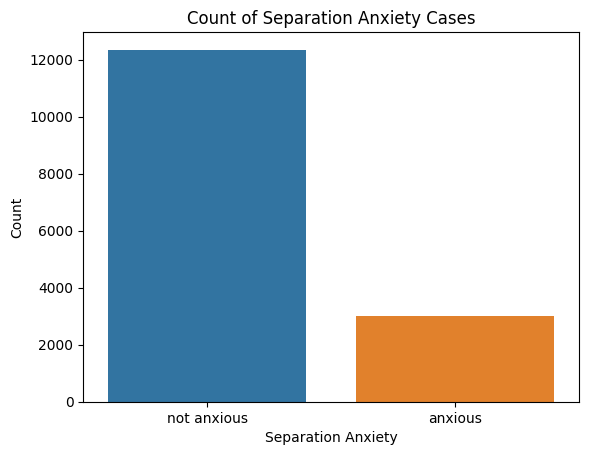

In [19]:
mean = subset["separation_behavior_score"].mean()
subset["anxious"] = ["anxious" if i>mean else "not anxious" for i in subset["separation_behavior_score"]]
sns.countplot(data=subset ,x="anxious",hue = "anxious")
plt.title("Count of Separation Anxiety Cases")
plt.xlabel("Separation Anxiety")
plt.ylabel("Count")

rozdelenie na psov co podla svojich majitelov nemaju spearation anxiety, ale podla nameranych hodnot ju maju nadpriemernu a tych co podla svojich majitelov maju sep anx, ale podla nameranych hodnot ju maju podpriemernu

1879
10927


Text(0, 0.5, 'Count')

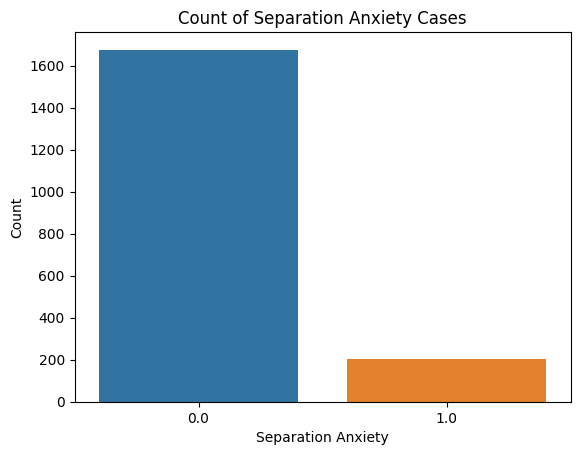

In [20]:
print(sum([len(subset.query("separation_anxiety == 0 and separation_behavior_score>=@mean")) + len(subset.query("separation_anxiety == 1 and separation_behavior_score<=@mean"))]))
print(len(subset.query("separation_anxiety == 0 or separation_anxiety == 1")))
sns.countplot(data=subset.query("separation_anxiety == 0 and separation_behavior_score>=@mean"), x="separation_anxiety")
sns.countplot(data=subset.query("separation_anxiety == 1 and separation_behavior_score<=@mean"), x="separation_anxiety")

plt.title("Count of Separation Anxiety Cases")
plt.xlabel("Separation Anxiety")
plt.ylabel("Count")


Pocet hodnot priznakov sep. anx.

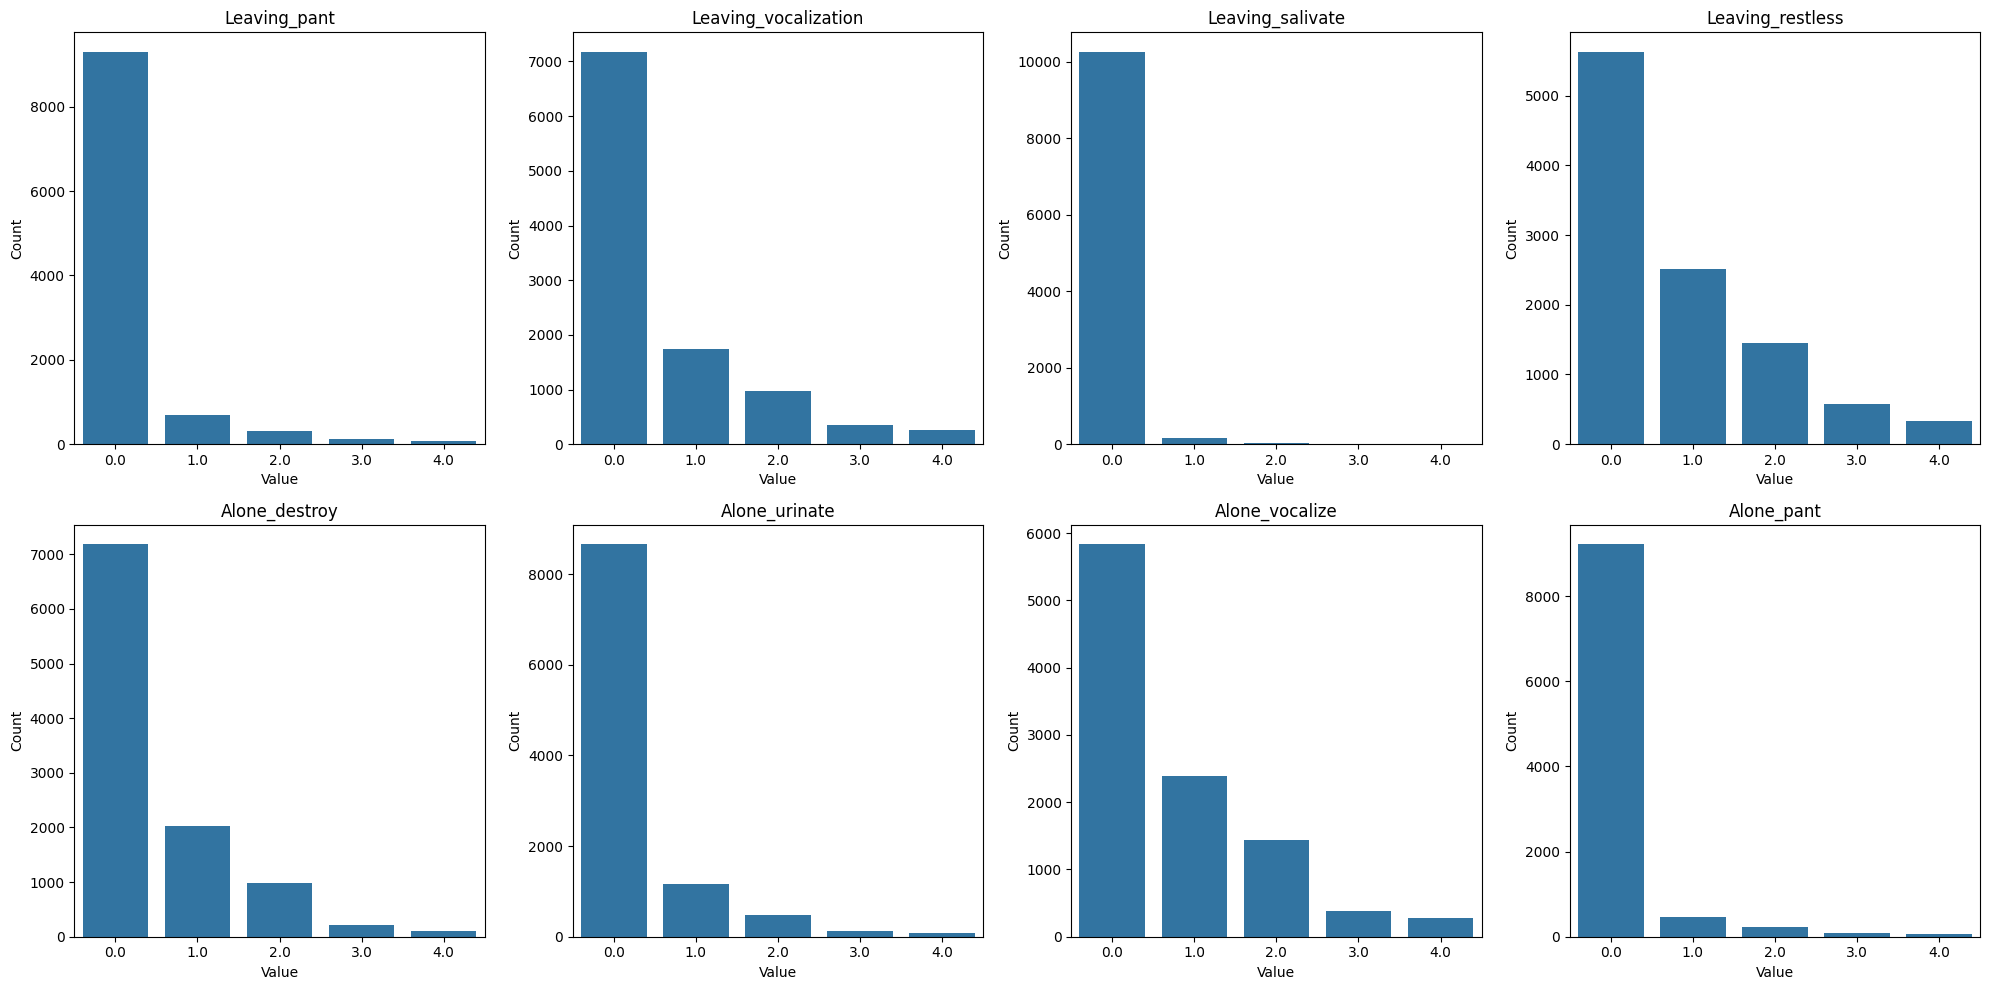

In [21]:
columns = ['Leaving_pant', 'Leaving_vocalization', 'Leaving_salivate', 'Leaving_restless',
           'Alone_destroy', 'Alone_urinate', 'Alone_vocalize', 'Alone_pant']

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.countplot(x=col, data=subset, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()



priemery priznakv sep anx, je viditelne ze najcastejsie priznamky su Leaving_restless a alone_vocalize rovnako ako vo vrchnom grafe

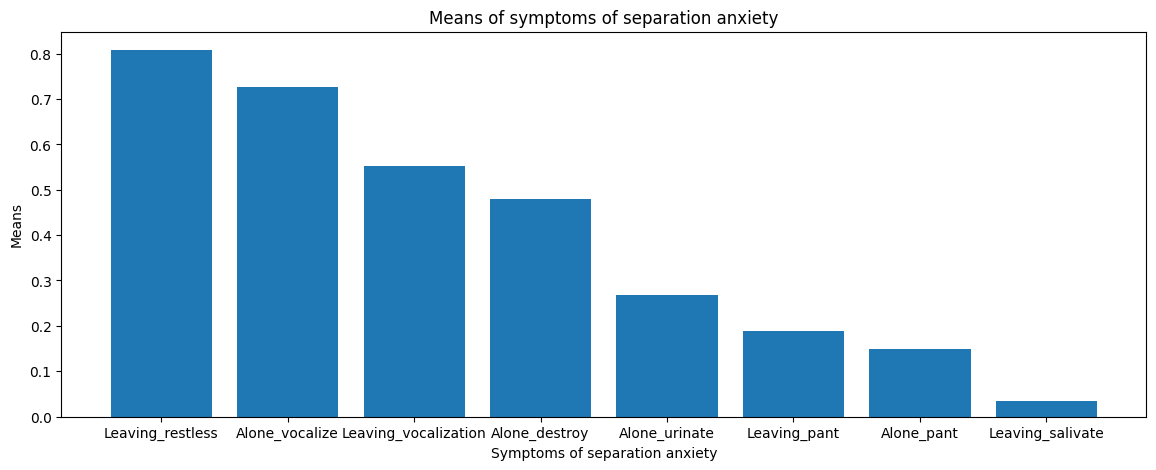

In [22]:
mean_values, symptoms = zip(*sorted([(subset[i].mean(),i) for i in columns], key=lambda x: x[0])[::-1])
plt.figure(figsize=(14, 5))
plt.bar(symptoms, mean_values)
plt.xlabel('Symptoms of separation anxiety')
plt.ylabel('Means')
plt.title('Means of symptoms of separation anxiety')
plt.grid(axis='y')
plt.grid(False)
plt.show()

In [24]:
fig = px.scatter(
    subset,
    x="Separation_age",
    y="separation_behavior_score",
    color="breed_group",
    hover_data=["breed_group"],
    title="Separation Age vs Behavior Score by Breed Group"
)

fig.update_layout(
    xaxis_title="Separation Age",
    yaxis_title="Separation Behavior Score",
    legend_title="Breed Group"
)

fig.show()